In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('playstore.csv')

In [3]:
df.head()

,app,category,rating,review,size,type,installs,price,content_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,10000,0,Everyone
1,Coloring book moana,FAMILY,3.9,974,14,Free,500000,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,Free,5000000,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,50000000,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,Free,100000,0,Everyone


### 1) List top 10 apps based on their reviews with category FAMILY

In [17]:
lst = []

for i in df.values:
    if(i[1] == 'FAMILY'):
        lst.append([i[0],i[3]])
        
df_pr = pd.DataFrame(lst, columns = ['category','review'])

df_pr.sort_values(by = 'review', ascending = False).head(10)

,category,review
50,Clash of Clans,44881447
47,Clash Royale,23125280
44,Candy Crush Saga,22419455
57,My Talking Tom,14885236
48,Pou,10483141
53,Minion Rush: Despicable Me Official Game,10214862
266,Hay Day,10053186
55,My Talking Angela,9876369
54,Farm Heroes Saga,7615646
22,Google Play Games,7168735


### 2) List top 5 most expensive apps in ART_AND_DESIGN

In [21]:
lst = []

for i in df.values:
    if(i[1] == 'ART_AND_DESIGN'):
        lst.append([i[0],i[7]])
        
df_pr = pd.DataFrame(lst, columns = ['category','price'])

df_pr.sort_values(by = 'price', ascending = False).head()

,category,price
50,X Launcher Prime: With OS Style Theme & No Ads,149
49,X Launcher Pro - IOS Style Theme & Control Center,149
48,"X Launcher Pro: PhoneX Theme, OS11 Control Center",149
0,Photo Editor & Candy Camera & Grid & ScrapBook,0
43,Little Teddy Bear Colouring Book Game,0


### 3) Average Price of an Application in ART_AND_DESIGN

In [24]:
lst = []

for i in df.values:
    if(i[1] == 'ART_AND_DESIGN'):
        lst.append([i[0],i[7]])
        
df_pr = pd.DataFrame(lst, columns = ['category','price'])

df_pr['price'].mean()

7.45

### 4) Average Price of application in every content_rating

In [25]:
df.head()

,app,category,rating,review,size,type,installs,price,content_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,10000,0,Everyone
1,Coloring book moana,FAMILY,3.9,974,14,Free,500000,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,Free,5000000,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,50000000,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,Free,100000,0,Everyone


In [32]:
for name in df['content_rating'].unique():
    print(name)

Everyone
Teen
Everyone 10+
Mature 17+
Adults only 18+
Unrated


In [35]:
for name in df['content_rating'].unique():
    lst = []
    for i in df.values:
        if(i[8] == name):
            lst.append([i[0],i[7]])

    df_pr = pd.DataFrame(lst, columns = ['content_rating','price'])
    print(name, " : ",int(df_pr['price'].mean()))

Everyone  :  92
Teen  :  47
Everyone 10+  :  32
Mature 17+  :  19
Adults only 18+  :  0
Unrated  :  0


### 5) Average Price of applicaiton in each Category

In [38]:
for name in df['category'].unique():
    lst = []
    for i in df.values:
        if(i[1] == name):
            lst.append([i[0],i[7]])

    df_pr = pd.DataFrame(lst, columns = ['category','price'])
    print(name, " : ",int(df_pr['price'].mean()))

ART_AND_DESIGN  :  7
FAMILY  :  94
AUTO_AND_VEHICLES  :  11
BEAUTY  :  0
BOOKS_AND_REFERENCE  :  40
BUSINESS  :  31
COMMUNICATION  :  19
COMICS  :  0
DATING  :  9
TOOLS  :  24
EDUCATION  :  5
ENTERTAINMENT  :  7
EVENTS  :  128
FINANCE  :  630
FOOD_AND_DRINK  :  5
HEALTH_AND_FITNESS  :  16
MEDICAL  :  186
HOUSE_AND_HOME  :  0
LIBRARIES_AND_DEMO  :  0
LIFESTYLE  :  479
GAME  :  23
SPORTS  :  22
VIDEO_PLAYERS  :  4
SOCIAL  :  5
SHOPPING  :  2
PHOTOGRAPHY  :  31
TRAVEL_AND_LOCAL  :  17
PERSONALIZATION  :  29
PRODUCTIVITY  :  50
PARENTING  :  11
WEATHER  :  30
NEWS_AND_MAGAZINES  :  1
MAPS_AND_NAVIGATION  :  15


### 6) Sort the Categories based on the average price of application (Top 10)

In [44]:
data = []

for name in df['category'].unique():
    lst = []
    for i in df.values:
        if(i[1] == name):
            lst.append([i[0],i[7]])

    df_pr = pd.DataFrame(lst, columns = ['category','price'])
    data.append([name,int(df_pr['price'].mean())])
    
df_pr = pd.DataFrame(data, columns= ['name','price'])

In [49]:
df_pr.sort_values( by = 'price', ascending = False).head(10)

,name,price
13,FINANCE,630
19,LIFESTYLE,479
16,MEDICAL,186
12,EVENTS,128
1,FAMILY,94
28,PRODUCTIVITY,50
4,BOOKS_AND_REFERENCE,40
5,BUSINESS,31
25,PHOTOGRAPHY,31
30,WEATHER,30


### 7) Ratio of Free vs Paid apps in Each Content Rating

In [66]:
for name in df['content_rating'].unique():
    
    f = 0
    p = 0

    for i in df.values:
        if (i[8] == name):
            if(i[5] == 'Free'):
                f += 1
            else:
                p += 1

    print(name ," : ", int(f/(f + p) * 100))

Everyone  :  91
Teen  :  94
Everyone 10+  :  90
Mature 17+  :  95
Adults only 18+  :  100
Unrated  :  100


### 8) Ratio of Free vs Paid apps in Each Category

In [75]:
for name in df['category'].unique():
    
    f = 0
    p = 0

    for i in df.values:
        if (i[1] == name):
            if(i[5] == 'Free'):
                f += 1
            else:
                p += 1
                
    print(name ," : ", int(f/(f + p) * 100))

ART_AND_DESIGN  :  95
FAMILY  :  90
AUTO_AND_VEHICLES  :  96
BEAUTY  :  100
BOOKS_AND_REFERENCE  :  87
BUSINESS  :  97
COMMUNICATION  :  91
COMICS  :  100
DATING  :  97
TOOLS  :  90
EDUCATION  :  98
ENTERTAINMENT  :  97
EVENTS  :  98
FINANCE  :  95
FOOD_AND_DRINK  :  98
HEALTH_AND_FITNESS  :  94
MEDICAL  :  79
HOUSE_AND_HOME  :  100
LIBRARIES_AND_DEMO  :  98
LIFESTYLE  :  94
GAME  :  91
SPORTS  :  92
VIDEO_PLAYERS  :  97
SOCIAL  :  98
SHOPPING  :  99
PHOTOGRAPHY  :  93
TRAVEL_AND_LOCAL  :  94
PERSONALIZATION  :  78
PRODUCTIVITY  :  92
PARENTING  :  96
WEATHER  :  89
NEWS_AND_MAGAZINES  :  99
MAPS_AND_NAVIGATION  :  96


### 9) Top 5 Categories in terms of free vs paid app ratio

In [90]:
lst = []

for name in df['category'].unique():
    
    f = 0
    p = 0

    for i in df.values:
        if (i[1] == name):
            if(i[5] == 'Free'):
                f += 1
            else:
                p += 1
                
    lst.append([name , int(f/(f + p) * 100)])
    
df_pr = pd.DataFrame(lst , columns = ['category', 'ratio'])

In [94]:
df_pr.sort_values( by = 'ratio', ascending = False).head()

,category,ratio
3,BEAUTY,100
7,COMICS,100
17,HOUSE_AND_HOME,100
31,NEWS_AND_MAGAZINES,99
24,SHOPPING,99


### 10) Frequency of apps in each rating

In [95]:
df.head()

,app,category,rating,review,size,type,installs,price,content_rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,Free,10000,0,Everyone
1,Coloring book moana,FAMILY,3.9,974,14,Free,500000,0,Everyone
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8,Free,5000000,0,Everyone
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,Free,50000000,0,Teen
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2,Free,100000,0,Everyone


In [103]:
for rating in df['rating'].unique():
    c = 0
    for i in df.values:
        if(i[2] == rating):
            c += 1
    print(rating , c)

4.1 622
3.9 359
4.7 438
4.5 849
4.3 896
4.4 2352
3.8 287
4.2 811
4.6 683
4.0 511
4.8 220
4.9 86
3.6 167
3.7 224
3.2 62
3.3 100
3.4 126
3.5 156
3.1 69
5.0 271
3.0 81
1.9 11
2.5 20
2.8 40
2.7 23
1.0 16
2.9 45
2.6 23
2.3 20
2.2 14
1.7 8
2.0 12
1.8 8
2.4 19
1.6 4
2.1 8
1.4 3
1.5 3
1.2 1


### 11) Frequency of apps in each rating Sorted Order by Rating

In [106]:
lst = []

for rating in df['rating'].unique():
    c = 0
    for i in df.values:
        if(i[2] == rating):
            c += 1
    lst.append([rating , c])
    
df_pr = pd.DataFrame(lst, columns = ['rating','freq'])

<AxesSubplot:>

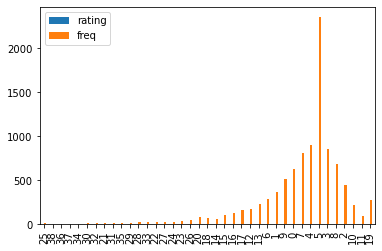

In [113]:
df_pr.sort_values(by = 'rating', ascending = True).plot(kind= 'bar')